In [267]:
import numpy as np
import pandas as pd
import uproot as up 
import os
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.path import Path
from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

print(os.getcwd())
%load_ext autoreload
%autoreload 2

import my_functions_in_coi as fct_in
import my_functions as fct

/Users/antoinevezon/Desktop/bruit_de_fond/Analyse
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [268]:
on_lab_desktop = False
on_my_laptop = not on_lab_desktop

#saving fig path
if on_lab_desktop == True:
    save_dir_path = "/home/vezon/bruit_de_fond"
if on_my_laptop == True:
    save_dir_path = "/Users/antoinevezon/Desktop/"


### LECTURE DU DATATREE ###                                                                            |Corresponding names manually created with mon_group2tree_v3       

rootfile_name_a = "Test_GADGET_GorG2orG4orG24_0001.root"         # 500mbar                             |GorG2orG4orG24.root" 500 mbar
rootfile_name_b = "Test_GADGET_GorG2orG4orG24_V2_0001.root"      # 500mbar                             |GorG2orG4orG24_V2.root" 500 mbar
rootfile_name_c = "Test_GADGET_1bar_GorG2orG4orG24.root"         #                                     |1bar_GorG2orG4orG24.root
rootfile_name_d = "Test_GADGET_1.5bar_GorG2orG4orG24_0001.root"  #                                     |1.5bar_GorG2orG4orG24.root

rootfile_name_e = "New_plastics_2000V_atleast_GADGET_withblackcover_500mbar_0001.root"  # \            |New_plastics_atleastGAD_500mbar.root
rootfile_name_f = "New_plastics_2500V_atleast_GADGET_withblackcover_1000mbar_0001.root" #  |           |New_plastics_atleastGAD_1000mbar.root
rootfile_name_g = "New_plastics_2500V_atleast_GADGET_withblackcover_ascension_0001.root"# /¦ 1500mbar  |New_plastics_atleastGAD_1500mbar.root
rootfile_name_h = "New_plastics_2000V_atleastGAD_Empty_0001.root"#                         ¦           |New_plastics_atleastGAD_Empty.root 
rootfile_name_i = "New_plastics_atleastGAD_Empty_V2_0001.root"   #                         ¦           |New_plastics_atleastGAD_Empty_V2.root
#                                                                                          v  
#                                                            QDC_2 & QDC_4 = resp. Right & Left_pastic ! 
#                                                            Donc il faut les échanger pour etre identique aux Empty   
rootfile_name_j = "AtleastGAD_woplastics_500mbar_0001.root"


##################################
rootfile_use = rootfile_name_j
##################################

if on_lab_desktop == True:
    path_to_DataTree = f"/home/vezon/bruit_de_fond/data/root/faster2root/{rootfile_use}:DataTree;1"
if on_my_laptop == True:
    path_to_DataTree = f"/Users/antoinevezon/Desktop/bruit_de_fond/data/root/faster2root/{rootfile_use}:DataTree;1"



DataTree = up.open(path_to_DataTree)

DataTree.show()

Keys = DataTree.keys()

print(f"Keys = {Keys}/n")

df = DataTree.arrays(Keys, library="pd")

#df = df.query("sub_Q != -999999") # On ne récupére que les QT2T

print(df.iloc[:,:12].head(20))

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
group_data_nb        | int64_t                  | AsDtype('>i8')
group_size           | int32_t                  | AsDtype('>i4')
group_time           | int64_t                  | AsDtype('>i8')
sub_num              | int32_t                  | AsDtype('>i4')
sub_time             | double                   | AsDtype('>f8')
sub_type             | char*                    | AsStrings()
sub_channel          | int32_t                  | AsDtype('>i4')
sub_Q                | int32_t                  | AsDtype('>i4')
sub_width            | int32_t                  | AsDtype('>i4')
sub_max_amp          | int32_t                  | AsDtype('>i4')
sub_max_pos          | int32_t                  | AsDtype('>i4')
sub_baseline         | int32_t                  | AsDtype('>i4')
sub_sat              | bool                     | AsDtype('bo

On a des valeurs de sub_time qui sont problématique

In [269]:
df = df.query("sub_time < 1000 & sub_type == 'QT2T'")

784367838
First group event at : 784367838 ns ~ 0.78 s ~ 0.01 min 
Last  group event at : 411994518326100 ns ~ 411994.52 s ~ 6866.58 min ~ 114.44 h
There is 115 sub_df in total
Name       |       Start [s] |        Stop [s] |  Events | Duration [s] |  Rate [Hz] |      Error |
----------------------------------------------------------------------------------------------------
Entire df  |          0.7844 |     411994.5183 | 1503685 |  411993.7340 |     3.6498 |     0.0030 |
----------------------------------------------------------------------------------------------------


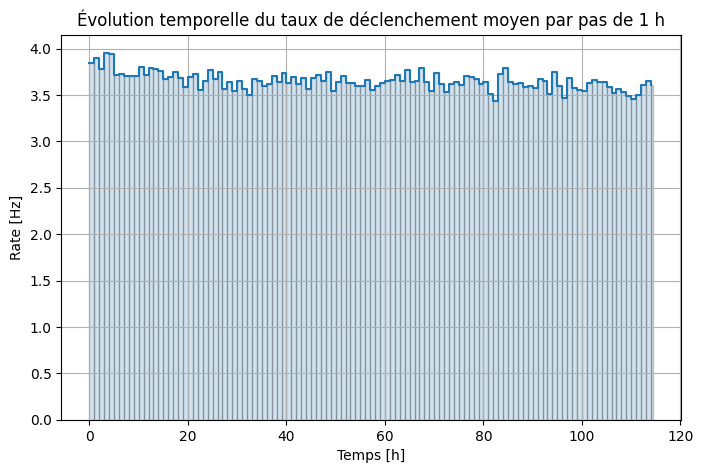

In [270]:
print(f"{df.iat[0,2]}")
sub_df, durations, t_firsts, rates = fct.split_in_sub_df_v2(df, delta_t = 1, show_sub_df = False, show_abstract = False, plot_rate_var = True, save_abstract = False, txt_to_show = '', save_dir=None, filename=None)


In [271]:
for i, r in enumerate(rates) : 
    if r==max(rates):
        idx_max_rate = i
        r_max = r
print(f"The sub_df with the highest rate is sub_df{i} at {r_max}")

The sub_df with the highest rate is sub_df114 at 3.9533659903495533


In [272]:
print(sub_df[idx_max_rate].head(50))

       group_data_nb  group_size      group_time  sub_num  sub_time  sub_type  \
41588         331599          96  10803251899702        1       0.0      QT2T   
41589         331599          96  10803251899702        2       8.0      QT2T   
41590         331599          96  10803251899702        3      14.0      QT2T   
41591         331599          96  10803251899702        4      22.0      QT2T   
41592         331615         120  10803718952732        1       0.0      QT2T   
41593         331615         120  10803718952732        2       8.0      QT2T   
41594         331615         120  10803718952732        3      12.0      QT2T   
41595         331615         120  10803718952732        4      26.0      QT2T   
41596         331615         120  10803718952732        5      56.0      QT2T   
41597         331625         168  10804026453668        1       0.0      QT2T   
41598         331625         168  10804026453668        2       4.0      QT2T   
41599         331625        

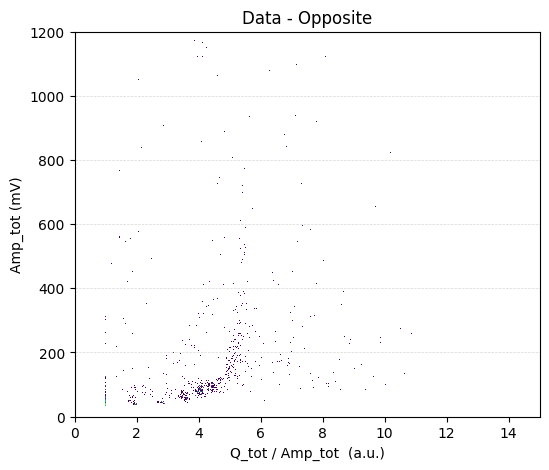

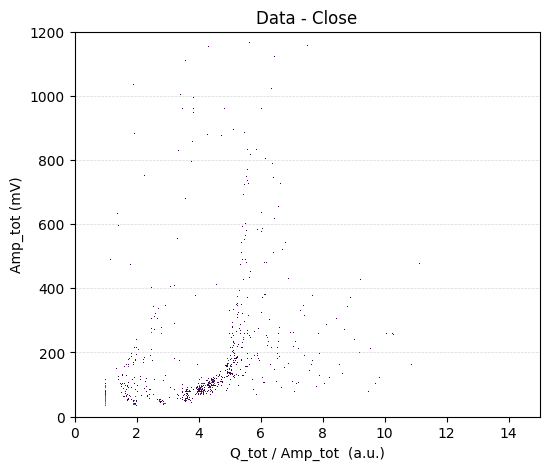

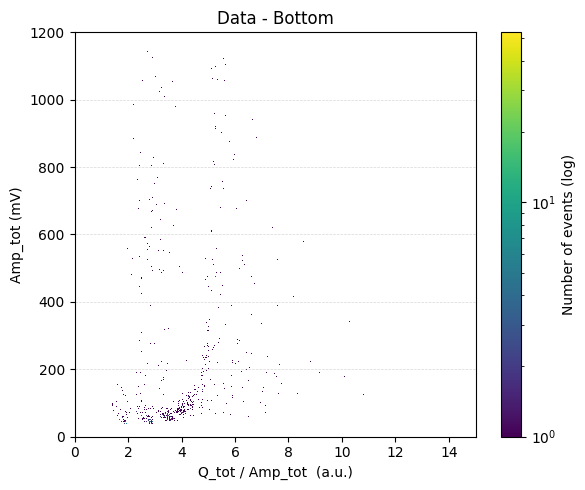

In [273]:
fct_in.plot_amp_ratio_hist2D(sub_df[idx_max_rate])

In [274]:
df_sub_num = {}
for i in range(1,10):
    df_sub_num[i] = df[(df.sub_num == i)]

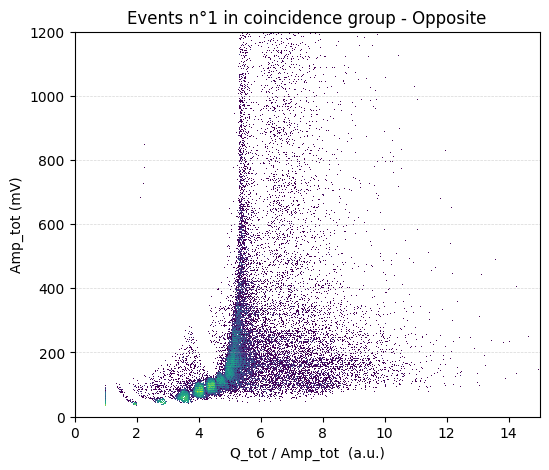

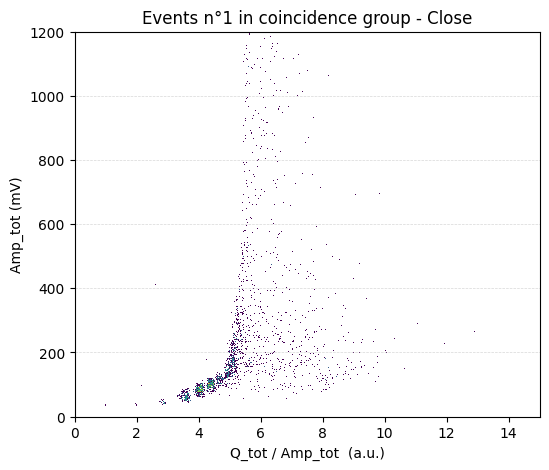

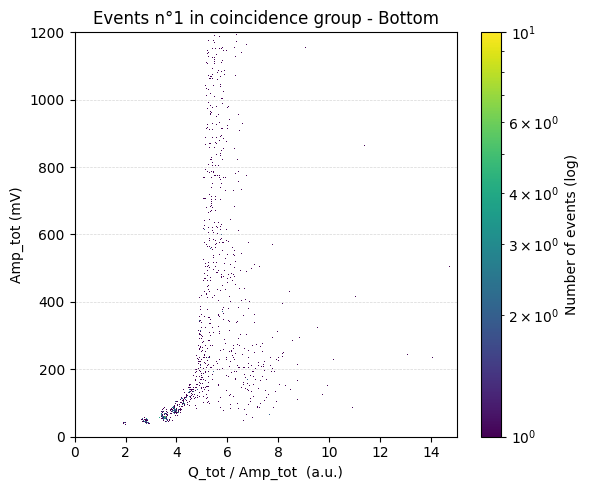

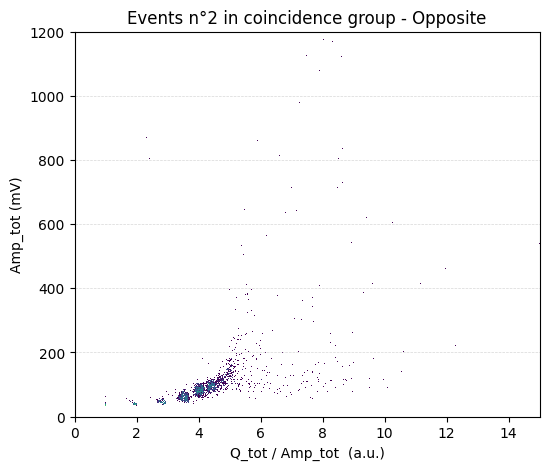

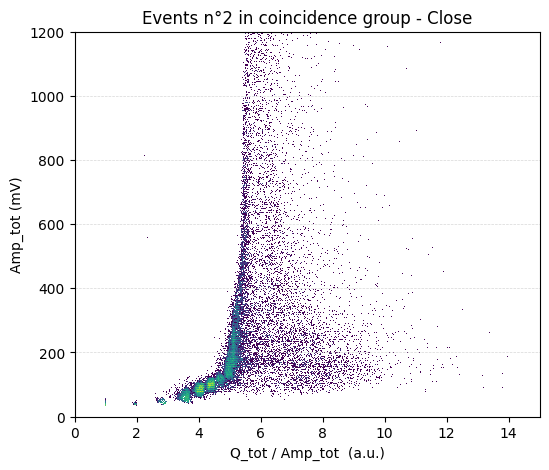

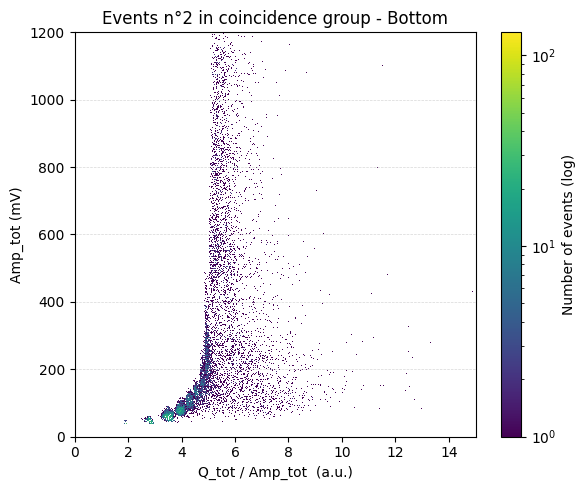

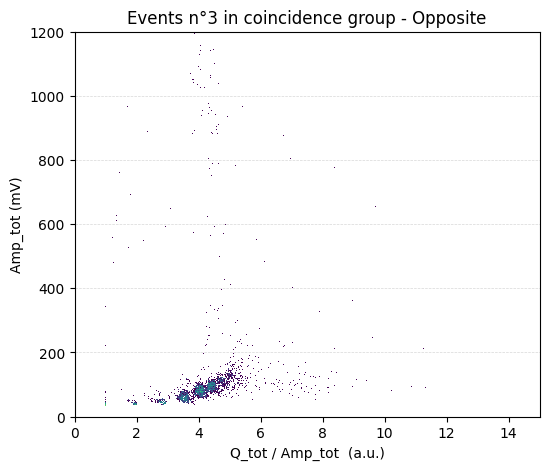

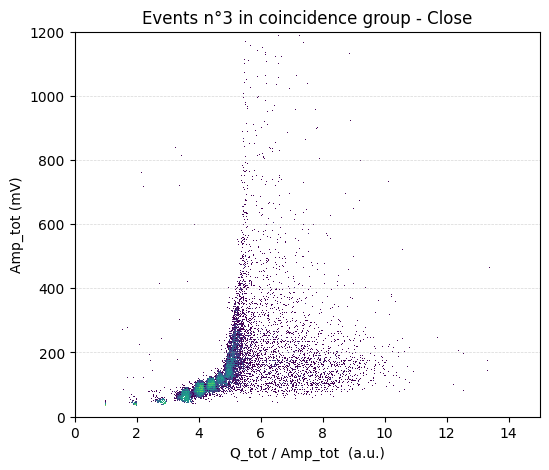

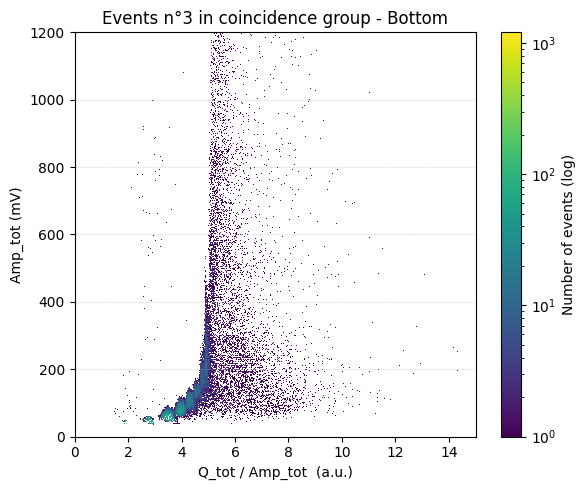

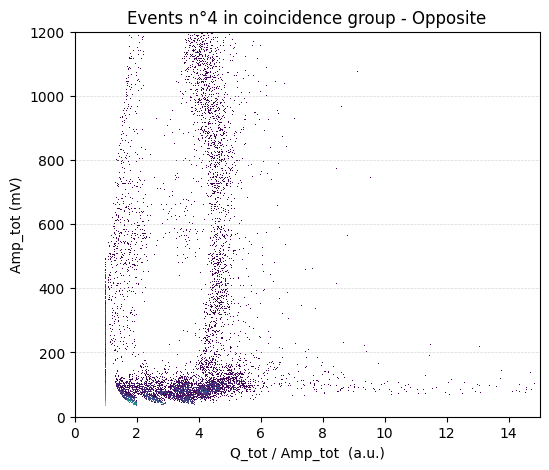

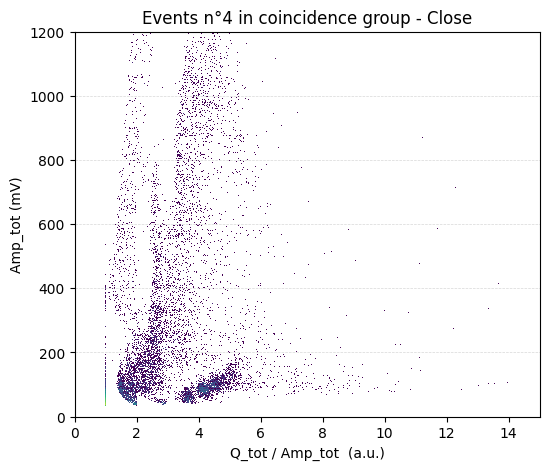

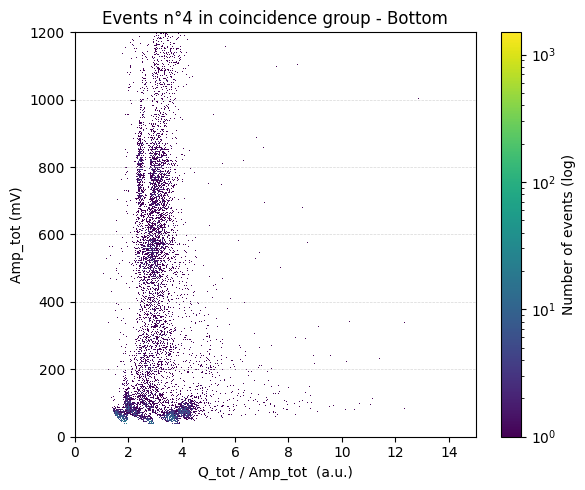

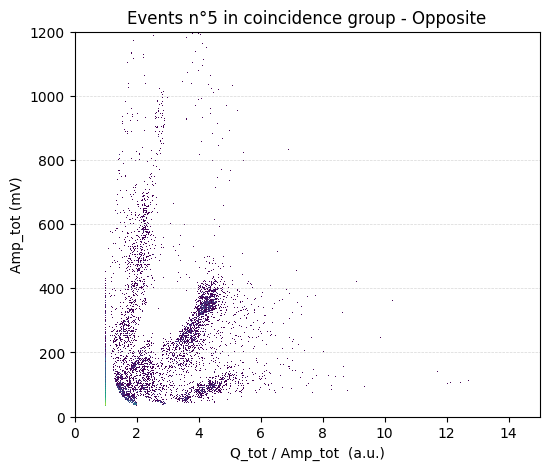

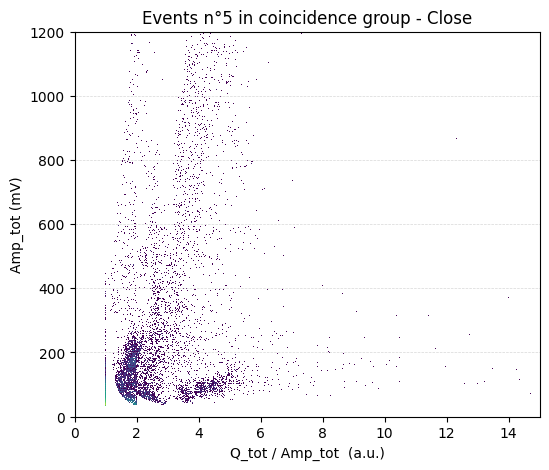

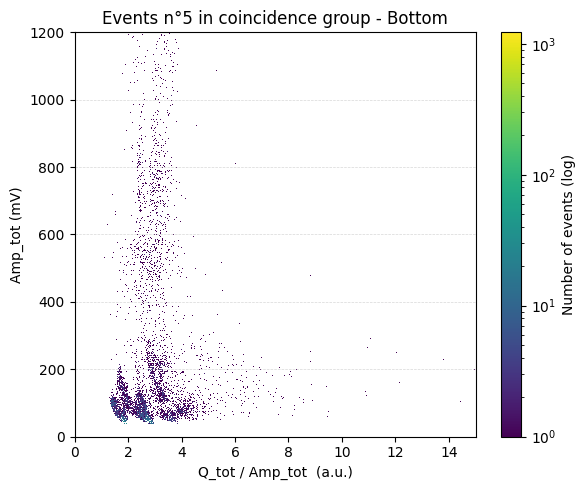

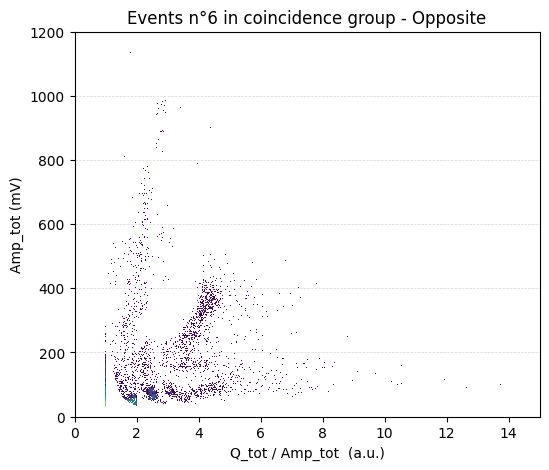

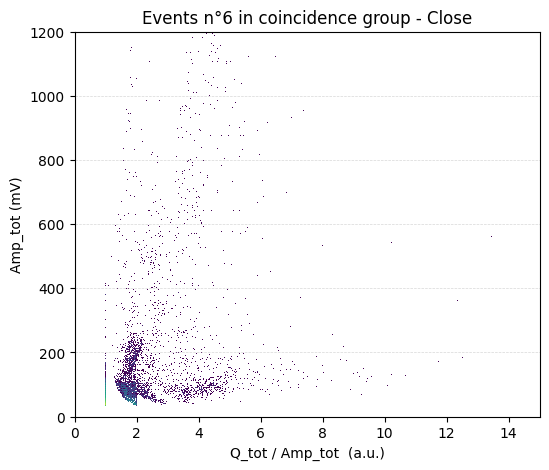

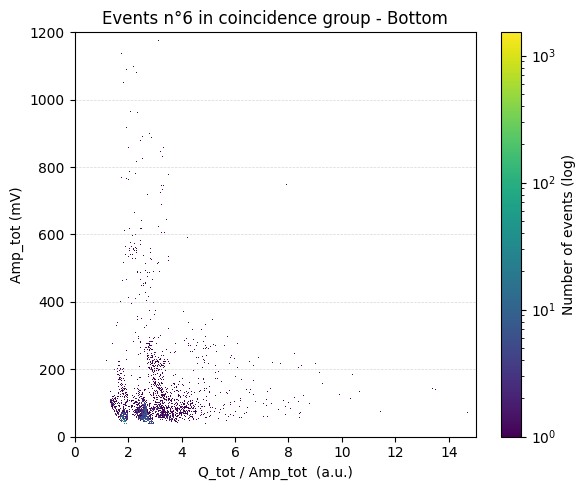

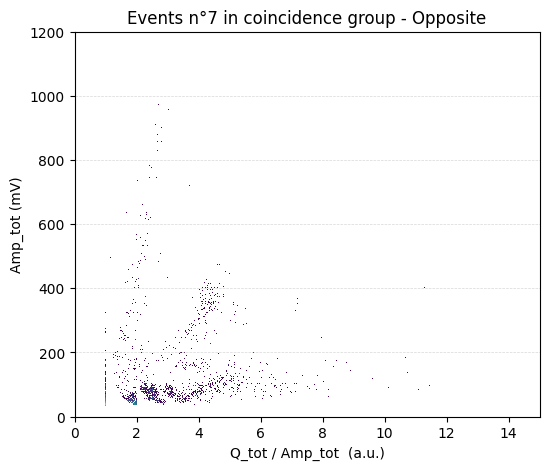

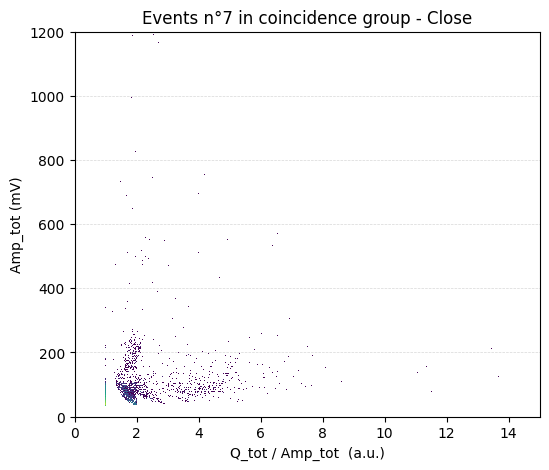

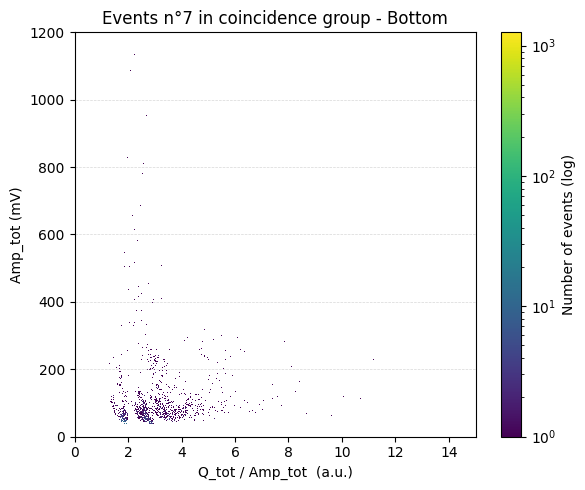

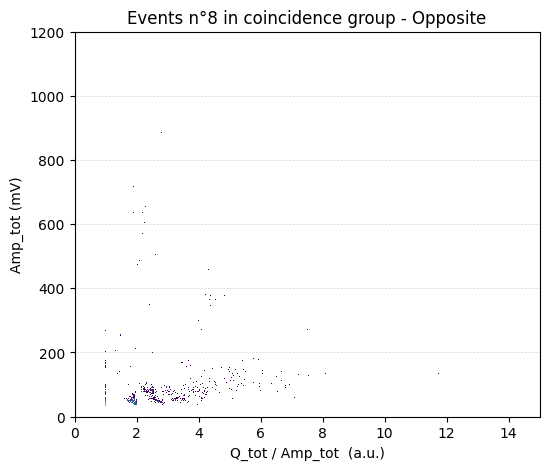

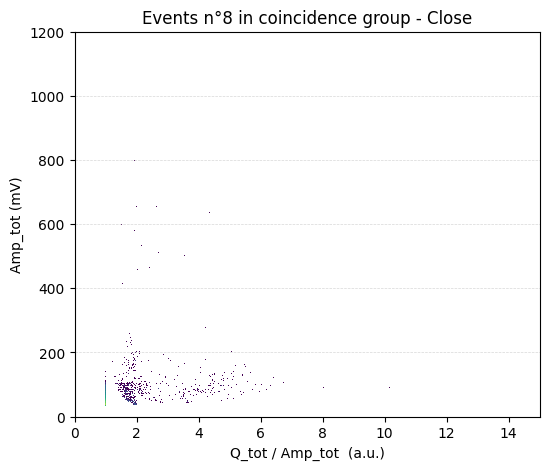

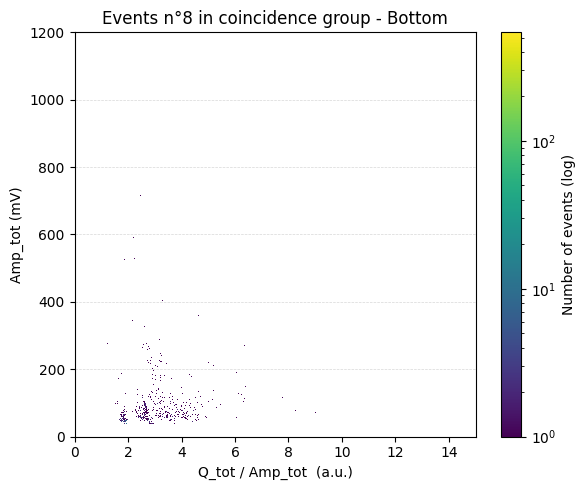

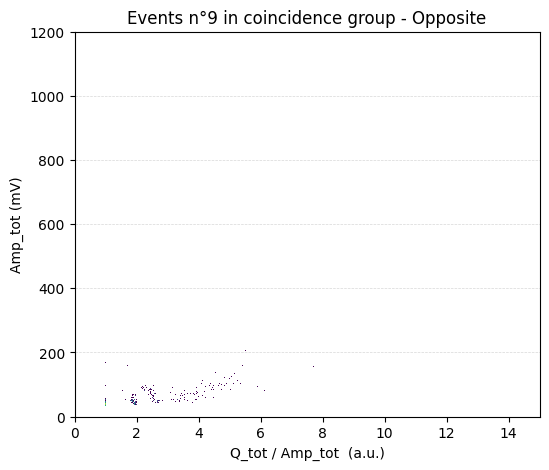

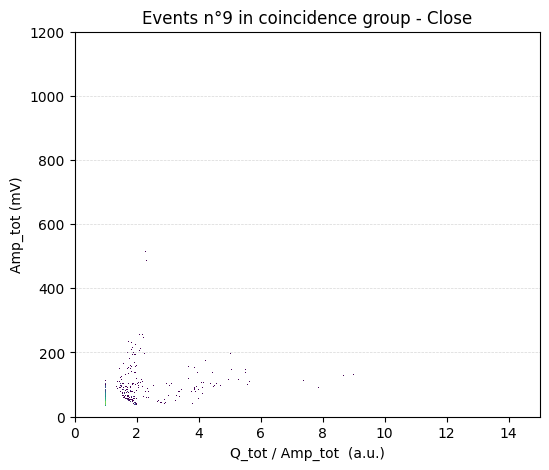

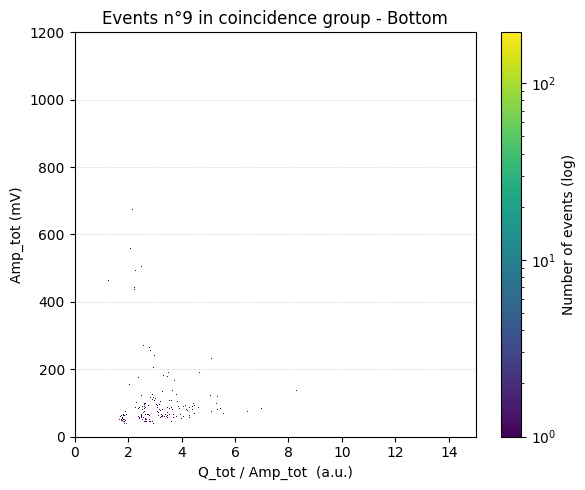

In [275]:
for i in range(1,10):
    fct_in.plot_amp_ratio_hist2D(df_sub_num[i],label=f"Events n°{i} in coincidence group" )

